In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.express as px
import plotly.io as pio
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
# warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [2]:
data = pd.read_csv('../Crawl data/Data/Products',index_col=0)
data.head()

,Title,Link,Brand,Price,Review,Total Review,Compatible Devices,Color,Number of Keys,Connectivity Technology,Rank
0,"Computer Keyboard Wired,7-Color Rainbow LED Ba...",https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Acebaff,$21.95,4.3 out of 5,450 global ratings,"Windows 11/10/8/7/XP/VISTA, Mac OS, Chrome OS...",Black,117.0,USB,#112 in Computer Keyboards
1,"MARVO Large Print Backlit Keyboard, WK712 Wire...",https://www.amazon.com/sspa/click?ie=UTF8&spc=...,MARVO,$28.99,4.5 out of 5,146 global ratings,"Laptop, PC, Smart TV",Black,109.0,USB-A,#277 in Computer Keyboards
2,X9 Wired Ergonomic Keyboard with Cushioned Wri...,https://www.amazon.com/X9-Performance-Ergonomi...,X9 Performance,$49.99,4.4 out of 5,"1,415 global ratings","Laptop, PC, Lenovo, Dell, Linux, HP, Micros...",Black,110.0,USB-A,#69 in Computer Keyboards
3,"Perixx PERIBOARD-106M, Wired Performance Full-...",https://www.amazon.com/Perixx-PERIBOARD-106M-P...,Perixx,$39.99,4.6 out of 5,"1,442 global ratings",PC,Beige,104.0,Wired,#316 in Computer Keyboards
4,Logitech MK120 Wired Keyboard and Mouse Combo ...,https://www.amazon.com/Logitech-Keyboard-Windo...,Logitech,Page 1 of 1,4.6 out of 5,"21,152 global ratings","Laptop, Personal Computer",Black,NaN,Usb,#9 in Computer Keyboards


In [3]:
#see some information of data
data.describe()

,Number of Keys
count,285.000000
mean,96.378947
std,24.338941
min,17.000000
25%,104.000000
50%,104.000000
75%,106.000000
max,117.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 0 to 310
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    311 non-null    object 
 1   Link                     311 non-null    object 
 2   Brand                    311 non-null    object 
 3   Price                    311 non-null    object 
 4   Review                   311 non-null    object 
 5   Total Review             311 non-null    object 
 6   Compatible Devices       311 non-null    object 
 7   Color                    306 non-null    object 
 8   Number of Keys           285 non-null    float64
 9   Connectivity Technology  311 non-null    object 
 10  Rank                     311 non-null    object 
dtypes: float64(1), object(10)
memory usage: 29.2+ KB


##### To do list to cleaning before analysting data
1. Extract Numbers
* Price Column: Extract numeric values from the price column and "Page 1 of 1" value to null.
* Review Column: Extract numeric values from the review column.
* Total Review Column: Extract numeric values from the total review column.
* Rank Column: Extract numeric values from the rank column.
2. Change Data Types
* Price Column: Convert the price column data type to float.
* Review Column: Convert the review column data type to float.
* Total Review Column: Convert the total review column data type to float.
* Rank Column: Convert the rank column data type to integer.
3. Handle Null and Duplicated Values
* Check for Null Values: Identify null values in all columns.
* Replace Null Values: Replace null values with the mean value of their respective columns.
* Check for Duplicates: Identify any duplicate rows in the dataset.
* Remove Duplicates: Remove duplicate rows to ensure data integrity.

In [5]:
#Extract Numbers
data["Review"] = data["Review"].str.split(" ").str[0].astype(float)
data["Total Review"] = data["Total Review"].str.split(" ").str[0].str.replace(",","").astype(int)
data["Rank"] = data["Rank"].str.strip().str.split(" ").str[0].str.replace("#","").str.replace (",","").astype(int)

In [6]:
data["Price"] = data["Price"].replace("Page 1 of 1",np.nan)
data["Price"] = data["Price"].str.replace("$","").astype(float)

In [7]:
data.head()

,Title,Link,Brand,Price,Review,Total Review,Compatible Devices,Color,Number of Keys,Connectivity Technology,Rank
0,"Computer Keyboard Wired,7-Color Rainbow LED Ba...",https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Acebaff,21.95,4.3,450,"Windows 11/10/8/7/XP/VISTA, Mac OS, Chrome OS...",Black,117.0,USB,112
1,"MARVO Large Print Backlit Keyboard, WK712 Wire...",https://www.amazon.com/sspa/click?ie=UTF8&spc=...,MARVO,28.99,4.5,146,"Laptop, PC, Smart TV",Black,109.0,USB-A,277
2,X9 Wired Ergonomic Keyboard with Cushioned Wri...,https://www.amazon.com/X9-Performance-Ergonomi...,X9 Performance,49.99,4.4,1415,"Laptop, PC, Lenovo, Dell, Linux, HP, Micros...",Black,110.0,USB-A,69
3,"Perixx PERIBOARD-106M, Wired Performance Full-...",https://www.amazon.com/Perixx-PERIBOARD-106M-P...,Perixx,39.99,4.6,1442,PC,Beige,104.0,Wired,316
4,Logitech MK120 Wired Keyboard and Mouse Combo ...,https://www.amazon.com/Logitech-Keyboard-Windo...,Logitech,NaN,4.6,21152,"Laptop, Personal Computer",Black,NaN,Usb,9


In [8]:
data.isnull().sum()

Title                       0
Link                        0
Brand                       0
Price                      59
Review                      0
Total Review                0
Compatible Devices          0
Color                       5
Number of Keys             26
Connectivity Technology     0
Rank                        0
dtype: int64

In [9]:
data["Price"] = data["Price"].replace(np.nan,data["Price"].mean())

In [10]:
data["Number of Keys"] = data["Number of Keys"].replace(np.nan,data["Number of Keys"].mean()).astype(int)

In [11]:
data.fillna({"Color":data["Color"].mode()[0]},inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 0 to 310
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    311 non-null    object 
 1   Link                     311 non-null    object 
 2   Brand                    311 non-null    object 
 3   Price                    311 non-null    float64
 4   Review                   311 non-null    float64
 5   Total Review             311 non-null    int64  
 6   Compatible Devices       311 non-null    object 
 7   Color                    311 non-null    object 
 8   Number of Keys           311 non-null    int64  
 9   Connectivity Technology  311 non-null    object 
 10  Rank                     311 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 29.2+ KB


In [13]:
data.duplicated().sum()

np.int64(1)

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.duplicated().sum()

np.int64(0)

### Exploratory Data Analysis

##### 1. **Calculate Average, Min, Max, Mean Price of Each Brand**
   - **Objective**: Determine the pricing statistics for each brand.
   - **Method**: Use groupby operations to aggregate statistics for each brand.

In [16]:
data["Brand"] = data["Brand"].str.strip()
data["Brand"].unique()

array(['Acebaff', 'MARVO', 'X9 Performance', 'Perixx', 'Logitech',
       'Macally', 'HP', 'EVGA', 'Amazon Basics', 'SABLUTE', 'Microsoft',
       'Azio', 'SteelSeries', 'Razer', 'Cherry', 'ROCCAT', 'LIZRROT',
       'MOWUX', 'KOPJIPPOM', 'Atelus', 'Soueto', 'Arteck', 'TopMate',
       'HeengYanson', 'JOYACCESS', 'Lenovo', 'Fosmon', 'MANHATTAN',
       'FOPETT', 'Nulea'], dtype=object)

In [17]:
brand_data = data.groupby("Brand")["Price"].agg(["min","max","mean","count"]).reset_index()
brand_data["mean"] = round(brand_data["mean"],2)
brand_data

,Brand,min,max,mean,count
0,Acebaff,20.99000,21.95000,21.52,20
1,Amazon Basics,16.82000,19.54000,18.25,19
2,Arteck,35.99000,54.99000,50.24,4
3,Atelus,19.99000,23.99000,21.99,2
4,Azio,97.42000,97.42000,97.42,10
5,Cherry,84.27000,84.27000,84.27,10
6,EVGA,59.99000,59.99000,59.99,9
7,FOPETT,37.99000,37.99000,37.99,1
8,Fosmon,29.98000,29.98000,29.98,1
9,HP,49.04496,49.04496,49.04,10


In [18]:
print(brand_data[brand_data["min"] == brand_data["min"].min()])
print(brand_data[brand_data["max"] == brand_data["max"].max()])

        Brand    min    max   mean  count
16  MANHATTAN  11.49  11.49  11.49      1
          Brand     min     max    mean  count
27  SteelSeries  139.99  139.99  139.99     10


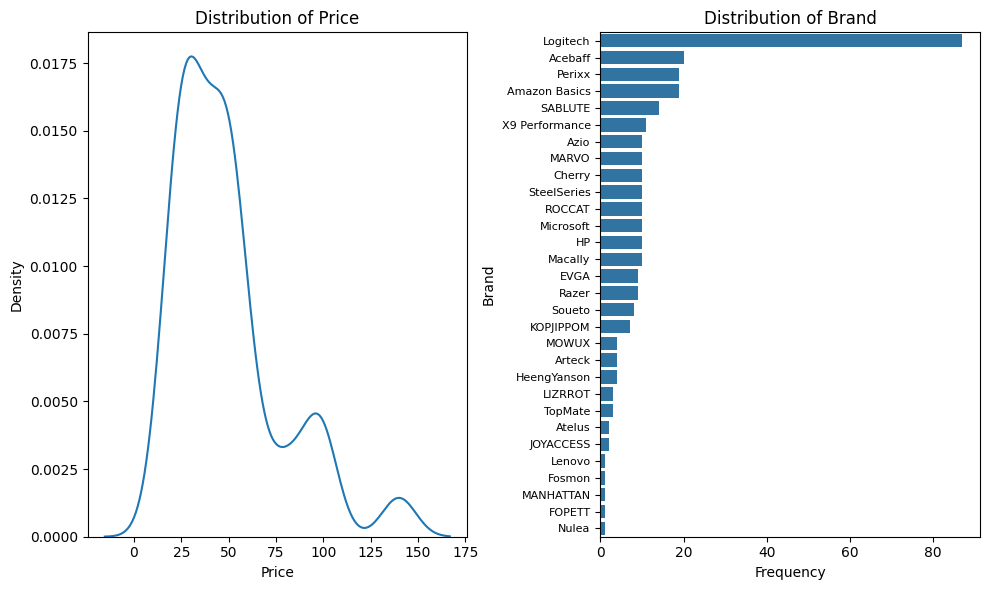

In [19]:
fig,ax = plt.subplots(1,2,figsize = (10,6))
sns.kdeplot(data=data, x = "Price",ax=ax[0])
ax[0].set_title("Distribution of Price")

sns.countplot(data=data,y="Brand",ax=ax[1],order=data["Brand"].value_counts(ascending=False).index)
ax[1].set_title("Distribution of Brand")
ax[1].set_xlabel("Frequency")
ax[1].tick_params(axis='y', labelsize=8)

# px.treemap(data = data,path="Brand",values="Price",ax=ax[1,(0,1)])
plt.tight_layout()
plt.show()
# data_min

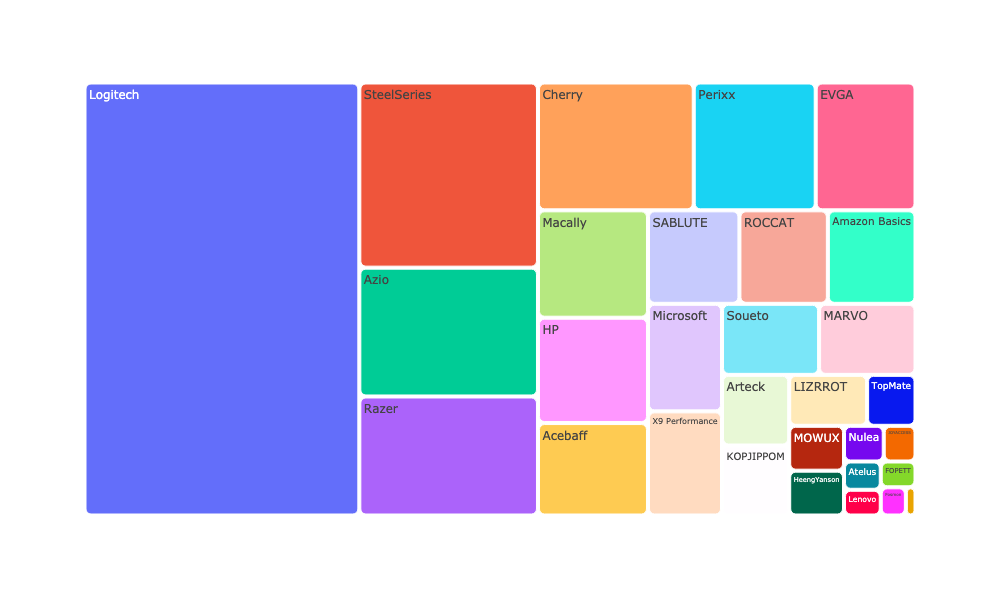

In [21]:
fig = px.treemap(data, path=["Brand"], values="Price",width=1000,height=600)
fig.update_traces(marker=dict(cornerradius=5))
fig.write_image('treemap.png')
# fig.show()
Image('treemap.png')

<b> General evaluations

1. **Price**
   - Prices range from $25 to $50.
   - The maximum price is $139.99, which belongs to the SteelSeries brand, but the minimum price for this brand is also $139.99.
   - The minimum price is $11.49, which belongs to the MANHATTAN brand, and the maximum price for this brand is also $11.49.
     -> Brands with minimum prices equal to their maximum prices suggest that all products from these brands are priced the same.

2. **Brand**
   - Logitech is the brand with the most products sold on Amazon and the highest total keyboard price.
   - Lenovo, Fosmon, MANHATTAN, FOPETT, and Nulea are brands with fewer products available on Amazon.

##### 2. **Calculate Average, Min, Max, Mean Review of Each Brand**
   - **Objective**: Analyze review statistics for each brand.
   - **Method**: Group data by brand and compute the required statistics for reviews.

In [23]:
review_data = data.groupby("Brand")["Review"].agg(["min","max","count","mean"]).reset_index()
review_data["mean"] = review_data["mean"].round(2)
review_data.sort_values(by=["min","max"],ascending=(True,True),ignore_index=True)

,Brand,min,max,count,mean
0,JOYACCESS,4.0,4.0,2,4.00
1,Amazon Basics,4.0,4.1,19,4.05
2,Perixx,4.0,4.6,19,4.28
3,Fosmon,4.1,4.1,1,4.10
4,Logitech,4.1,4.6,87,4.48
5,MANHATTAN,4.2,4.2,1,4.20
6,Macally,4.2,4.2,10,4.20
7,TopMate,4.2,4.2,3,4.20
8,Soueto,4.2,5.0,8,4.30
9,Acebaff,4.3,4.3,20,4.30


<b> General evaluations
- All brands have ratings above 4 out of 5.
- The lowest rating is 4.0 for the Perixx brand, which supplies 19 products on Amazon, with a maximum rating of 4.6.
- Soueto is a brand with a maximum rating of 5.0, offering 8 products with an average rating of 4.3.
- The highest average rating is 4.7 for the HeengYanson brand, which supplies only 4 products on Amazon, with an average price of about $25.


##### 3. **Calculate Average, Min, Max, Mean Rank of Each Brand**
   - **Objective**: Evaluate ranking statistics for each brand.
   - **Method**: Similar to the previous tasks, use groupby to aggregate rank statistics.

In [24]:
rank_data = data.groupby("Brand")["Rank"].agg(["min","max","count","mean"]).reset_index()
rank_data["mean"] = rank_data["mean"].round(2)
rank_data

,Brand,min,max,count,mean
0,Acebaff,112,1497,20,735.25
1,Amazon Basics,1596,2215,19,1889.21
2,Arteck,55,62,4,60.25
3,Atelus,128,225,2,176.50
4,Azio,700,729,10,726.10
5,Cherry,248,248,10,248.00
6,EVGA,1571,1571,9,1571.00
7,FOPETT,422,422,1,422.00
8,Fosmon,28,28,1,28.00
9,HP,3,3,10,3.00


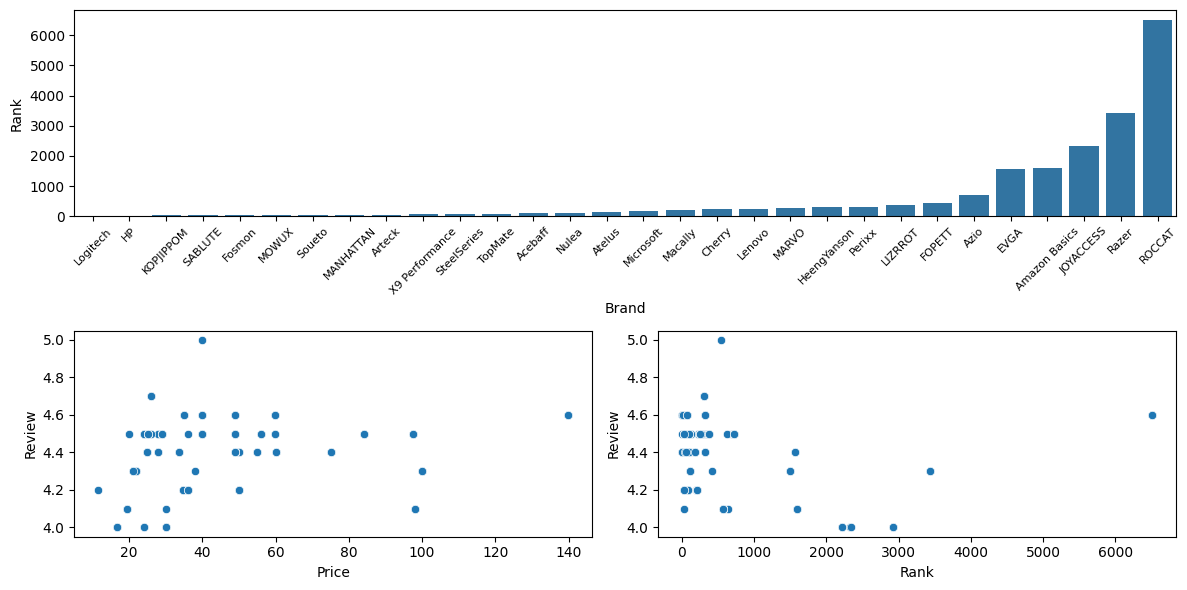

In [25]:
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
sorted_brands = rank_data.sort_values(by='min', ascending=True)['Brand']
sns.barplot(data=rank_data, x="Brand", y="min", errorbar=None, order=sorted_brands)
plt.ylabel("Rank")
plt.xticks(rotation = 45,fontsize = 8)


plt.subplot(2,2,3)
sns.scatterplot(data=data,x="Price",y="Review")

plt.subplot(2,2,4)
sns.scatterplot(data=data,x="Rank",y="Review")

plt.tight_layout()


<b> General evaluations:
- Logitech is the top brand, meaning they have products ranked #1 on Amazon, but they also have products with a rank of 647.
- HP is in second position and maintains a consistent rank for all its products, with the minimum rank equal to the maximum rank.
- ROCCAT is the brand with the lowest rank on Amazon, holding position #6511 with 10 products, with an average price of $34.99.
- There are outliers in the two scatterplots. Ranks below 1000 tend to have the most reviews, and products priced in the range of $20 to $60 also tend to have the most reviews.
  -> Higher rank generally corresponds to a lower price.

4. **Calculate Mean, Max, Min, Average of Each Brand’s Total Reviews (Units Sold)**
<br> Because total reviews show the number of people who writing reviews -> considers columns as units sold temporarily
   - **Objective**: Analyze sales data for each brand.
   - **Method**: Aggregate total reviews (units sold) by brand and compute the required statistics.

In [26]:
data.rename(columns={"Total Review":"Sold"},inplace=True)
sold_data = data.groupby("Brand")["Sold"].agg(["min","max","count","mean","sum"]).reset_index()
sold_data["mean"] = sold_data["mean"].round(2)
sold_data_sorted = sold_data.sort_values(by='sum',ascending=True,ignore_index=True)
sold_data_sorted

,Brand,min,max,count,mean,sum
0,JOYACCESS,5,5,2,5.00,10
1,HeengYanson,29,29,4,29.00,116
2,LIZRROT,41,41,3,41.00,123
3,Razer,89,89,9,89.00,801
4,Cherry,88,89,10,88.70,887
5,Nulea,1075,1075,1,1075.00,1075
6,MARVO,146,146,10,146.00,1460
7,Atelus,907,907,2,907.00,1814
8,MOWUX,502,502,4,502.00,2008
9,Soueto,1,303,8,265.25,2122


In [27]:
data[data["Sold"] == 36809]

,Title,Link,Brand,Price,Review,Sold,Compatible Devices,Color,Number of Keys,Connectivity Technology,Rank
146,Logitech K400 Plus Wireless Touch With Easy Me...,https://www.amazon.com/Logitech-Wireless-Keybo...,Logitech,49.04496,4.5,36809,"Laptop, PC, Smart TV, Tablet, Smartphone",Black,84,"RF, Unifying Receiver",1


In [28]:
data[data["Sold"] == 1]

,Title,Link,Brand,Price,Review,Sold,Compatible Devices,Color,Number of Keys,Connectivity Technology,Rank
309,"RGB Wireless Keyboard with 7-Color Backlit, Co...",https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Soueto,39.99,5.0,1,"Laptop, Gaming Console, PC, Smart TV",Black,102,"USB-A, USB-C",540


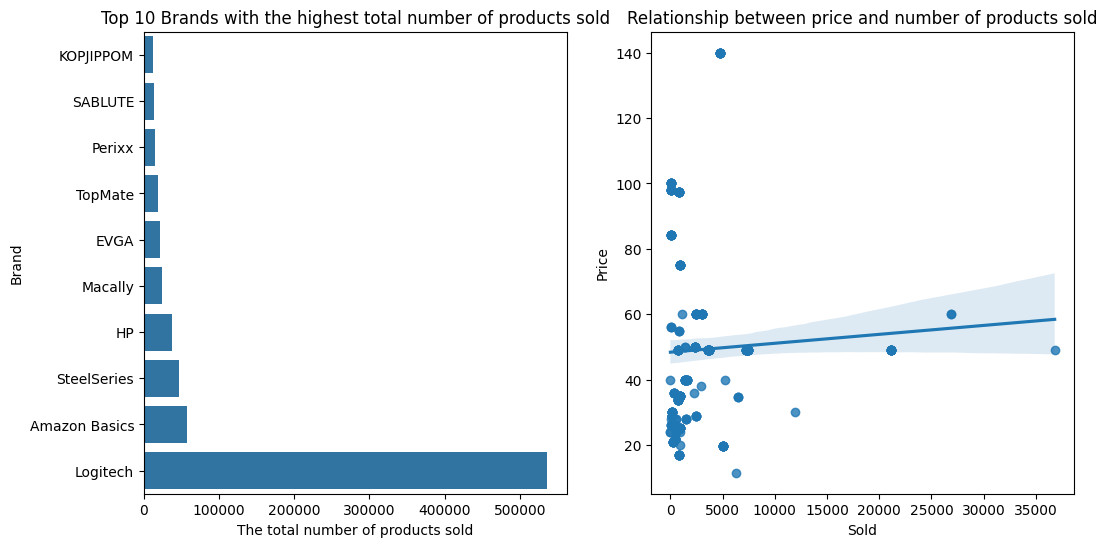

In [29]:
fig,ax = plt.subplots(1,2,figsize = (12,6))
sns.barplot(sold_data_sorted.tail(10),x="sum",y="Brand",ax=ax[0])
ax[0].set_xlabel("The total number of products sold")
ax[0].set_title("Top 10 Brands with the highest total number of products sold")

sns.regplot(data = data, x = "Sold", y = "Price",ax=ax[1])
ax[1].set_title("Relationship between price and number of products sold")
plt.show()

<b> General evaluations:
- Logitech is the brand with the highest number of products sold (36,809) that have a 75% layout, priced at $49, and ranked 1.
- Soueto is the brand with the lowest number of products sold—only 1 product—with a Tenkeyless layout, priced at $39.99, and ranked 540.
- Price is not the main factor affecting the number of units sold; a lower price does not necessarily mean that the products will sell more.

5. **Count Number of Products of Each Brand and Each Connectivity Technology**
   - **Objective**: Determine product counts for brands and connectivity technologies.
   - **Method**: Use value counts or groupby to tally the number of products.

In [30]:
data.columns

Index(['Title', 'Link', 'Brand', 'Price', 'Review', 'Sold',
       'Compatible Devices', 'Color', 'Number of Keys',
       'Connectivity Technology', 'Rank'],
      dtype='object')

In [31]:
data["Connectivity Technology"].unique()

array([' USB ', ' USB-A ', ' Wired ', ' Usb ', ' Wireless, Bluetooth ',
       ' wired ', ' Bluetooth ', ' wireless ', ' USB-A, USB 2.0 ',
       ' USB only (Non-Bluetooth) ', ' Bluetooth, USB-C ', ' USB-C ',
       ' RF, USB ', ' USB, USB-A ', ' Micro USB ', ' USB Wireless ',
       ' Bluetooth, USB ', ' Wireless ', ' RF, Unifying Receiver ',
       ' Bluetooth, 2.4G USB ', ' USB-A, USB-C '], dtype=object)

In [32]:
connectivity = data[["Brand",'Review', 'Sold','Connectivity Technology']]
connectivity

,Brand,Review,Sold,Connectivity Technology
0,Acebaff,4.3,450,USB
1,MARVO,4.5,146,USB-A
2,X9 Performance,4.4,1415,USB-A
3,Perixx,4.6,1442,Wired
4,Logitech,4.6,21152,Usb
...,...,...,...,...
306,Logitech,4.4,958,"RF, USB"
307,Arteck,4.4,791,USB Wireless
308,Acebaff,4.3,277,USB
309,Soueto,5.0,1,"USB-A, USB-C"


In [33]:
#function for change elements in column into binary
def add_binary_columns(df,col_name,keywords):
    for keyword in keywords:
        df[keyword.capitalize()] = df[col_name].apply(lambda x: 1 if keyword.lower() in x.lower() else 0)
    return df

In [34]:
keywords = ["usb","wireless","bluetooth","rf"]
df = add_binary_columns(connectivity,'Connectivity Technology',keywords=keywords)
df

,Brand,Review,Sold,Connectivity Technology,Usb,Wireless,Bluetooth,Rf
0,Acebaff,4.3,450,USB,1,0,0,0
1,MARVO,4.5,146,USB-A,1,0,0,0
2,X9 Performance,4.4,1415,USB-A,1,0,0,0
3,Perixx,4.6,1442,Wired,0,0,0,0
4,Logitech,4.6,21152,Usb,1,0,0,0
...,...,...,...,...,...,...,...,...
306,Logitech,4.4,958,"RF, USB",1,0,0,1
307,Arteck,4.4,791,USB Wireless,1,1,0,0
308,Acebaff,4.3,277,USB,1,0,0,0
309,Soueto,5.0,1,"USB-A, USB-C",1,0,0,0


In [35]:
brand_connect_tech = df.groupby("Brand")[["Usb","Wireless","Bluetooth","Rf"]].sum().reset_index()
brand_connect_tech

,Brand,Usb,Wireless,Bluetooth,Rf
0,Acebaff,20,0,0,0
1,Amazon Basics,19,0,19,0
2,Arteck,4,3,0,0
3,Atelus,2,0,0,0
4,Azio,0,0,0,0
5,Cherry,10,0,0,0
6,EVGA,9,0,0,0
7,FOPETT,1,0,0,0
8,Fosmon,0,1,0,0
9,HP,0,10,0,0


In [36]:
data_tech = df[["Usb","Wireless","Bluetooth","Rf"]].sum().reset_index()
data_tech.columns = ["Category", "Count"]
data_tech.sort_values(by="Count",ignore_index=True)

,Category,Count
0,Rf,11
1,Wireless,34
2,Bluetooth,68
3,Usb,217


<b> General evaluations:
- USB is the primary connectivity technology, and Bluetooth is the second.
- According to the data above, the major brand Logitech also sells more products that connect via USB compared to others.

6. **Analyze Keyboard Data**
   - **Add Layout Column**: Categorize keyboards by layout type based on key count.
   - **Find Most Common Layout**: Identify the most frequent keyboard layout.
   - **Sum Layouts by Brand**: Aggregate layout counts for each brand.
   - **Identify Most Popular Color**: Determine the most frequent color.


In [37]:
def keyboard_layout(keyboard_num):
    layout = ""
    if keyboard_num >= 104:
        layout += "Full Size"
    elif keyboard_num >= 87:
        layout += "Tenkeyless"
    elif keyboard_num >= 84:
        layout += "75%"
    elif keyboard_num >= 64:
        layout += "60%"
    else:
        layout += "40%"
    return layout

data["Layout"] = data["Number of Keys"].apply(keyboard_layout)
data

,Title,Link,Brand,Price,Review,Sold,Compatible Devices,Color,Number of Keys,Connectivity Technology,Rank,Layout
0,"Computer Keyboard Wired,7-Color Rainbow LED Ba...",https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Acebaff,21.95000,4.3,450,"Windows 11/10/8/7/XP/VISTA, Mac OS, Chrome OS...",Black,117,USB,112,Full Size
1,"MARVO Large Print Backlit Keyboard, WK712 Wire...",https://www.amazon.com/sspa/click?ie=UTF8&spc=...,MARVO,28.99000,4.5,146,"Laptop, PC, Smart TV",Black,109,USB-A,277,Full Size
2,X9 Wired Ergonomic Keyboard with Cushioned Wri...,https://www.amazon.com/X9-Performance-Ergonomi...,X9 Performance,49.99000,4.4,1415,"Laptop, PC, Lenovo, Dell, Linux, HP, Micros...",Black,110,USB-A,69,Full Size
3,"Perixx PERIBOARD-106M, Wired Performance Full-...",https://www.amazon.com/Perixx-PERIBOARD-106M-P...,Perixx,39.99000,4.6,1442,PC,Beige,104,Wired,316,Full Size
4,Logitech MK120 Wired Keyboard and Mouse Combo ...,https://www.amazon.com/Logitech-Keyboard-Windo...,Logitech,49.04496,4.6,21152,"Laptop, Personal Computer",Black,96,Usb,9,Tenkeyless
...,...,...,...,...,...,...,...,...,...,...,...,...
306,Logitech K350 Keyboard - Wireless Connectivity...,https://www.amazon.com/Logitech-K350-Keyboard-...,Logitech,75.19000,4.4,958,PC,Black,17,"RF, USB",320,40%
307,Arteck Split Ergonomic Keyboard with Cushioned...,https://www.amazon.com/Arteck-Ergonomic-Keyboa...,Arteck,54.99000,4.4,791,"Computers, Laptop, PC, Desktop",Black,102,USB Wireless,62,Tenkeyless
308,"Gaming Keyboard with Large Print Keys, 7-Color...",https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Acebaff,20.99000,4.3,277,"Windows 11/10/8/7/XP/VISTA, Mac OS, Chrome OS...",Black,104,USB,1497,Full Size
309,"RGB Wireless Keyboard with 7-Color Backlit, Co...",https://www.amazon.com/sspa/click?ie=UTF8&spc=...,Soueto,39.99000,5.0,1,"Laptop, Gaming Console, PC, Smart TV",Black,102,"USB-A, USB-C",540,Tenkeyless


In [38]:
layout_data = data[["Brand","Layout","Color","Price","Rank","Sold"]]
layout_data

,Brand,Layout,Color,Price,Rank,Sold
0,Acebaff,Full Size,Black,21.95000,112,450
1,MARVO,Full Size,Black,28.99000,277,146
2,X9 Performance,Full Size,Black,49.99000,69,1415
3,Perixx,Full Size,Beige,39.99000,316,1442
4,Logitech,Tenkeyless,Black,49.04496,9,21152
...,...,...,...,...,...,...
306,Logitech,40%,Black,75.19000,320,958
307,Arteck,Tenkeyless,Black,54.99000,62,791
308,Acebaff,Full Size,Black,20.99000,1497,277
309,Soueto,Tenkeyless,Black,39.99000,540,1


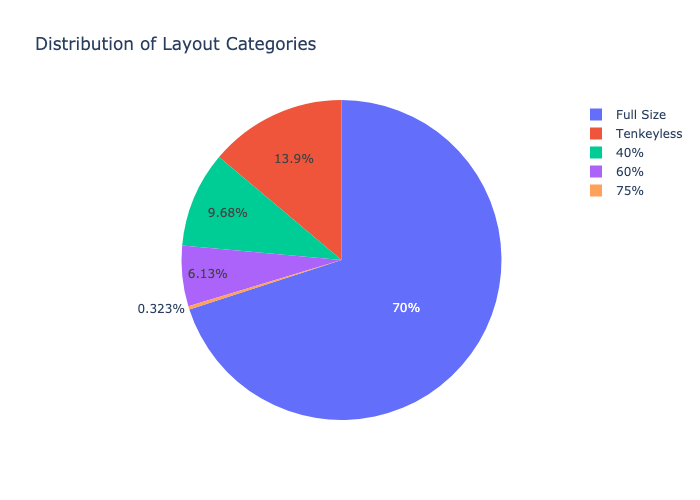

In [39]:
# layout_distribution = layout_data.Layout.value_counts().reset_index()

fig = px.pie(data_frame=layout_data,names="Layout",title="Distribution of Layout Categories")
fig.write_image("piechart.png")
Image('piechart.png')
# fig.show()


In [40]:
df_key=pd.pivot_table(data = layout_data,columns="Layout",index="Brand",aggfunc="size",fill_value=0)
df_key["Total"] = df_key["40%"]+df_key["60%"]+df_key["75%"]+df_key["Full Size"]+df_key["Tenkeyless"]
# df_key.sort_values(by="Total",ascending=False)
# df_key = df_key.rename_axis(None,axis=1)
df_key

Layout,40%,60%,75%,Full Size,Tenkeyless,Total
Brand,,,,,,
Acebaff,0,0,0,20,0,20
Amazon Basics,0,0,0,9,10,19
Arteck,0,0,0,1,3,4
Atelus,0,0,0,2,0,2
Azio,0,0,0,10,0,10
Cherry,0,0,0,10,0,10
EVGA,0,0,0,9,0,9
FOPETT,0,0,0,0,1,1
Fosmon,0,0,0,1,0,1


In [41]:
layout_data.groupby("Layout")["Sold"].sum()

Layout
40%            80600
60%            14033
75%            36809
Full Size     365916
Tenkeyless    370888
Name: Sold, dtype: int64

<b> General evaluations:
- The full-size layout is still the most favored, but its total sales rank second.
- The 75% layout accounts for only 0.323% of sales and has a total of 36,809 units sold.
- The Tenkeyless layout has the highest sales.

In [42]:
layout_data["Color"] = layout_data["Color"].str.lower()
df_color = layout_data["Color"].value_counts().reset_index()
df_color

,Color,count
0,black,201
1,graphite,18
2,matte black,10
3,bronze w/mx2a brown,10
4,black and silver,10
5,white,10
6,ttc brown,10
7,silver,10
8,space grey,9
9,beige,9


In [43]:
# f_key=pd.pivot_table(data = layout_data,columns="Layout",index="Brand",aggfunc="size",fill_value=0)
color_layout = pd.pivot_table(data=layout_data,columns="Color",index="Layout",aggfunc="size",fill_value=0)
color_layout

Color,backlit,beige,black,black and silver,black/orange,blue & white,blue colorful,bronze w/mx2a brown,graphite,led backlit- green,led backlit- pink,matte black,purple colorful,rose gold black,silver,space grey,ttc brown,v2030 grey colorful,white
Layout,,,,,,,,,,,,,,,,,,,
40%,0,0,20,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0
60%,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,9,0,0,0
75%,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Full Size,1,9,155,10,1,0,1,10,16,1,1,0,2,0,0,0,10,0,0
Tenkeyless,0,0,25,0,0,2,0,0,2,0,0,0,0,3,0,0,0,1,10


<b> General evaluations: 
- Black is the most favorite color and full size layout black keyboards are more than others
- Graphite is also known as Graphite is a dark to medium gray which the second favorite color 

7. **Separate Compatible Devices Column to Find Most Popular Devices**
    - **Objective**: Analyze which devices are most popular.
    - **Method**: Split the compatible devices column and count occurrences of each device type.

In [44]:
data["Compatible Devices"].unique()

array([' Windows 11/10/8/7/XP/VISTA, Mac OS, Chrome OS, Linux ',
       ' Laptop, PC, Smart TV ',
       '   Laptop, PC, Lenovo, Dell, Linux, HP, Microsof Surface, Acer, Asus, Samsung, Chromebook, Alienware, Razer, LG   See more  ',
       ' PC ', ' Laptop, Personal Computer ',
       ' iPhone, Apple Mac Pro / Mini, Macbook Pro / Air, iMac, iPad ',
       ' Laptop ', ' Laptop, Gaming Console, PC ', ' Laptop, PC ',
       ' Compatible on Windows, macOS, Linux and Chrome OS ',
       ' Personal Computer ', ' Laptop, PC, Tablet, Smartphone ',
       ' Laptop, PC, Windows, Mac ', ' Gaming Console ',
       '   Windows, Xbox, PlayStation, and Mac OS X*. USB port required *Not all software features supported on Mac OS   See more  ',
       ' computers and devices with USB connectivity ',
       ' PC, Tablet, Smartphone ', ' Laptop, PC, Tablet ',
       ' Laptop, PC, Gaming Console, Smart TV ',
       ' Computers, Laptop, PC, Desktop ',
       ' Laptop, Gaming Console, Smart TV, PC ',
       

In [45]:
data_devices = data[["Brand","Compatible Devices","Price"]]

In [46]:
keywords = ["windows","mac","laptop","pc","smart tv","gaming console"]
df = add_binary_columns(data_devices,"Compatible Devices",keywords)
df

,Brand,Compatible Devices,Price,Windows,Mac,Laptop,Pc,Smart tv,Gaming console
0,Acebaff,"Windows 11/10/8/7/XP/VISTA, Mac OS, Chrome OS...",21.95000,1,1,0,0,0,0
1,MARVO,"Laptop, PC, Smart TV",28.99000,0,0,1,1,1,0
2,X9 Performance,"Laptop, PC, Lenovo, Dell, Linux, HP, Micros...",49.99000,0,0,1,1,0,0
3,Perixx,PC,39.99000,0,0,0,1,0,0
4,Logitech,"Laptop, Personal Computer",49.04496,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
306,Logitech,PC,75.19000,0,0,0,1,0,0
307,Arteck,"Computers, Laptop, PC, Desktop",54.99000,0,0,1,1,0,0
308,Acebaff,"Windows 11/10/8/7/XP/VISTA, Mac OS, Chrome OS...",20.99000,1,1,0,0,0,0
309,Soueto,"Laptop, Gaming Console, PC, Smart TV",39.99000,0,0,1,1,1,1


In [47]:
df_brand_device = df.groupby("Brand")[["Windows","Mac","Laptop","Pc","Smart tv","Gaming console"]].sum().reset_index()
df_brand_device

,Brand,Windows,Mac,Laptop,Pc,Smart tv,Gaming console
0,Acebaff,20,20,0,0,0,0
1,Amazon Basics,0,0,0,0,0,0
2,Arteck,0,0,4,4,0,0
3,Atelus,0,0,2,2,0,0
4,Azio,0,0,10,10,0,0
5,Cherry,0,0,0,10,0,0
6,EVGA,0,0,9,9,0,0
7,FOPETT,0,0,1,0,0,0
8,Fosmon,0,0,0,0,0,1
9,HP,0,0,10,10,0,0


In [48]:
new_df = df_brand_device[["Windows","Mac","Laptop","Pc","Smart tv","Gaming console"]].sum().reset_index()
new_df.columns = ["Devices","Count"]
new_df.sort_values(by="Count",ascending=True,ignore_index=True,inplace=True)

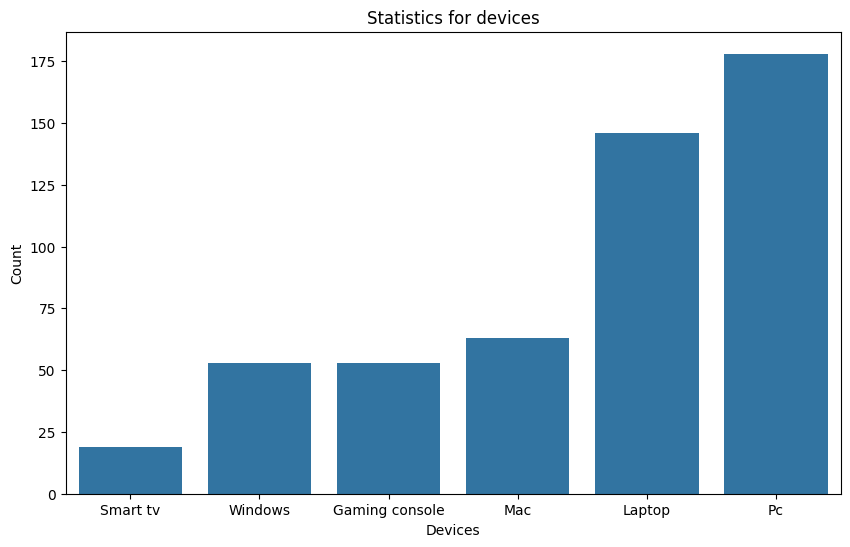

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(data=new_df,x = "Devices",y="Count")

plt.title("Statistics for devices")
plt.show()

<b> General evaluations:
- PCs are the most favored devices.
- Acebaff is a brand that primarily offers products for Mac and Windows.
- Logitech manufactures keyboards for PCs and laptops. Logitech continues to lead in producing products compatible with almost all devices.
- MARVO produces keyboards compatible with smart TVs, with a total of 10 products, while Logitech has only 1 product for this purpose.